# Data Labelling Analysis (DLA) 

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = 'C:/Users/27261/Desktop/prostate/code-0126/' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for data labelling analisys
from data_labelling import mix_data
from data_labelling import split_data
from data_labelling import DataPreProcessor
from data_labelling import ClassificationModels

os.chdir(HOME_PATH)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
DATA_TYPES = ['Real','GM','SDV-FML','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV-FML','CTGAN','WGANGP']
HOME_PATH = "Dataset_cedric/SYNTHETIC DATASETS_not_eanr/"
FILEPATHS = {'Real' : HOME_PATH + "Train.csv",
            'GM' : HOME_PATH + 'GM.csv',
            'SDV-FML' : HOME_PATH + 'SDV-FML.csv',
            'CTGAN' : HOME_PATH + 'CTGAN.csv',
            'WGANGP' : HOME_PATH + 'WGANGP.csv'}
categorical_columns = ["cT(MRI)","Multifocaal", "pN", "1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)"]
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':            Age Multifocaal 1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)  \
 0    60.254795           0                                                  3   
 1    66.391781           1                                                  3   
 2    69.010959           0                                                  1   
 3    41.136986           0                                                  3   
 4    74.665753           0                                                  1   
 ..         ...         ...                                                ...   
 228  68.350685           0                                                  1   
 229  73.531507           0                                                  1   
 230  65.734247           0                                                  1   
 231  60.189041           0                                                  1   
 232  69.282192           1                                                  2   
 
      

## 2. Mix real data with synthetic data

In [5]:
mixed_data = dict()
for name in SYNTHESIZERS:
    mixed_data[name] = mix_data(data['Real'], data[name])
mixed_data

{'GM':            Age Multifocaal 1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)  \
 3    41.136986           0                                                  3   
 81   57.547945           0                                                  1   
 92   56.965785           1                                                  1   
 206  72.531507           0                                                  1   
 175  64.600000           0                                                  1   
 ..         ...         ...                                                ...   
 32   64.495890           0                                                  3   
 226  57.101370           0                                                  1   
 181  70.639589           0                                                  1   
 93   47.153969           0                                                  3   
 122  58.479452           0                                                  1   
 
      Pr

- 0 for real data
- 1 for synthetic data

## 2. Split train and test data

In [6]:
train_len = 0.8
train_data = dict()
test_data = dict()
for name in SYNTHESIZERS :
    print(name)
    train_data[name], test_data[name] = split_data(mixed_data[name], train_len)
    print(train_data[name].shape, test_data[name].shape)
    print('Train data', train_data[name].groupby('Label').size())
    print('Test data', test_data[name].groupby('Label').size())
    print('##############################################')

GM
(372, 35) (93, 35)
Train data Label
0.0    188
1.0    184
dtype: int64
Test data Label
0.0    44
1.0    49
dtype: int64
##############################################
SDV-FML
(372, 35) (93, 35)
Train data Label
0.0    190
1.0    182
dtype: int64
Test data Label
0.0    42
1.0    51
dtype: int64
##############################################
CTGAN
(372, 35) (93, 35)
Train data Label
0.0    195
1.0    177
dtype: int64
Test data Label
0.0    38
1.0    55
dtype: int64
##############################################
WGANGP
(372, 35) (93, 35)
Train data Label
0.0    186
1.0    186
dtype: int64
Test data Label
0.0    46
1.0    47
dtype: int64
##############################################


## 3. Train Classifiers

In [7]:
numerical_columns = numerical_columns = data['Real'].select_dtypes(include=['int64']).columns.tolist()
categorical_columns = ["cT(MRI)","Multifocaal", "pN", "1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)"]
data = dict()
categories = [np.array(range(7)), np.array(range(2)), np.array(range(2)), np.array(range(4))]

#initialize classifiers
classifiers_all = dict()
data_preprocessors = dict()

target = 'Label'   # discriminator

for name in SYNTHESIZERS : 
    print(name)
    
    classifiers_all[name] = ClassificationModels()
    data_preprocessors[name] = DataPreProcessor(categorical_columns, numerical_columns, categories)
    x_train = data_preprocessors[name].preprocess_train_data(train_data[name].iloc[:, train_data[name].columns != target])
    y_train = train_data[name].loc[:, target]
    
    classifiers_all[name].train_classifiers(x_train, y_train)
    
    print('####################################################')

GM
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
SDV-FML
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
CTGAN
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
WGANGP
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################


## 5. Evaluate Classifiers

In [8]:
results_all = dict()
for name in SYNTHESIZERS : 
    print(name)
    
    x_test = data_preprocessors[name].preprocess_test_data(test_data[name].loc[:, test_data[name].columns != target])
    print(x_test.shape)
    y_test = test_data[name].loc[:, target]
    
    classifiers_all[name].evaluate_classifiers(x_test, y_test)
    print('####################################################')

GM
(93, 34)
####################################################
SDV-FML
(93, 34)
####################################################
CTGAN
(93, 34)
####################################################
WGANGP
(93, 34)
####################################################


some model evaluation metrics (accuracy, precision, recall, and F1 score) are perfect 1.0. In machine learning, this situation is usually rare, especially when you use several different models. This may be caused by the following reasons:

**Overfitting**:
If the training data is very small or the model is very complex, the model may learn the noise and details in the training data instead of the underlying patterns. This means that a model that performs perfectly on training data may perform poorly on unseen data.

**Test data leakage**:
If the test data is accidentally used during training, the model may have "seen" the test data and therefore be able to predict them perfectly.

**Non-representative test data**:
The test set may not be a good representation of the problem space. For example, the test set may be too simple or contain only a specific class of examples, making it easy for the model to predict.

## 6. Analyse models results

In [18]:
classifiers_all["GM"].evaluate_classifiers(x_test, y_test)

[('RF',
    model  accuracy  precision  recall      f1
  0    RF    0.6774     0.6104     1.0  0.7581),
 ('KNN',
    model  accuracy  precision  recall      f1
  0   KNN    0.9892     0.9792     1.0  0.9895),
 ('DT',
    model  accuracy  precision  recall      f1
  0    DT    0.5484     0.5316  0.8936  0.6667),
 ('SVM',
    model  accuracy  precision  recall      f1
  0   SVM    0.8065     0.7231     1.0  0.8393),
 ('MLP',
    model  accuracy  precision  recall      f1
  0   MLP    0.9677     0.9583  0.9787  0.9684)]

In [29]:
import re

results_with_classifiers = classifiers_all["GM"].evaluate_classifiers(x_test, y_test)

all_numbers = []

for _, df in results_with_classifiers:

    numbers = df.iloc[0, 1:].values  
    all_numbers.extend(numbers)

print(all_numbers)



[0.6774, 0.6104, 1.0, 0.7581, 0.9892, 0.9792, 1.0, 0.9895, 0.5484, 0.5316, 0.8936, 0.6667, 0.8065, 0.7231, 1.0, 0.8393, 0.9677, 0.9583, 0.9787, 0.9684]


In [28]:
classifier_names = ['RF', 'KNN', 'DT', 'SVM', 'MLP']

reshaped_metrics = [all_numbers[i:i+4] for i in range(0, len(all_numbers), 4)]

# Create the DataFrame with the specified row labels
df_with_labels = pd.DataFrame(reshaped_metrics, 
                              index=classifier_names, 
                              columns=['accuracy', 'precision', 'recall', 'f1'])

df_with_labels

,accuracy,precision,recall,f1
RF,1.0,1.0,1.0,1.0
KNN,1.0,1.0,1.0,1.0
DT,1.0,1.0,1.0,1.0
SVM,1.0,1.0,1.0,1.0
MLP,1.0,1.0,1.0,1.0


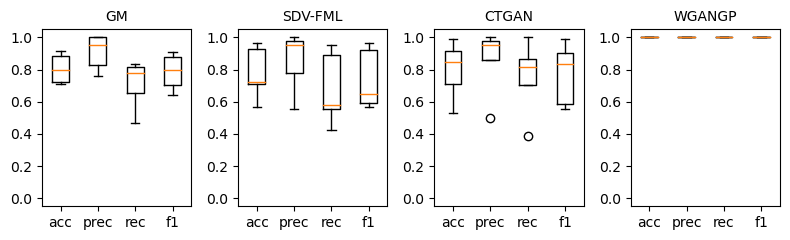

In [14]:
# fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(8, 2.5))
# axs_idxs = [[0,0], [0,1], [1,0], [1,1]]
# axs_idxs = [0, 1, 2, 3]
# idx = dict(zip(SYNTHESIZERS,axs_idxs))

# for name in SYNTHESIZERS :
#     ax_plot = axs[idx[name]]
#     classifiers_all[name].plot_classification_metrics(ax_plot)
#     ax_plot.set_title(name, fontsize=10)

# plt.tight_layout()
# # fig.savefig('DATA LABELLING RESULTS/CLASSIFICATION_METRICS.svg', bbox_inches='tight')

In [22]:
for name in SYNTHESIZERS:
    results_with_classifiers = classifiers_all[name].evaluate_classifiers(x_test, y_test)
    all_numbers = []

    for _, df in results_with_classifiers:
        numbers = df.iloc[0, 1:].values  
        all_numbers.extend(numbers)

    reshaped_metrics = [all_numbers[i:i+4] for i in range(0, len(all_numbers), 4)]
    df_with_labels = pd.DataFrame(reshaped_metrics, 
                                index=classifier_names, 
                                columns=['accuracy', 'precision', 'recall', 'f1'])
    print(df_with_labels)

     accuracy  precision  recall      f1
RF     0.6774     0.6104  1.0000  0.7581
KNN    0.9892     0.9792  1.0000  0.9895
DT     0.5484     0.5316  0.8936  0.6667
SVM    0.8065     0.7231  1.0000  0.8393
MLP    0.9677     0.9583  0.9787  0.9684
     accuracy  precision  recall      f1
RF     0.3656     0.0714  0.0213  0.0328
KNN    0.5054     1.0000  0.0213  0.0417
DT     0.4409     0.4194  0.2766  0.3333
SVM    0.8925     0.8246  1.0000  0.9038
MLP    0.3548     0.0000  0.0000  0.0000
     accuracy  precision  recall      f1
RF     0.3656     0.2857  0.1702  0.2133
KNN    0.4946     0.0000  0.0000  0.0000
DT     0.2688     0.0800  0.0426  0.0556
SVM    0.4946     0.5000  0.6383  0.5607
MLP    0.5484     0.5926  0.3404  0.4324
     accuracy  precision  recall   f1
RF        1.0        1.0     1.0  1.0
KNN       1.0        1.0     1.0  1.0
DT        1.0        1.0     1.0  1.0
SVM       1.0        1.0     1.0  1.0
MLP       1.0        1.0     1.0  1.0
